In [ ]:
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
omega_linear = lambda t: 0.5 * t

In [ ]:
def simulate(nu, omega, t_max = 3):
    U = 1.0  # Exempelvärde
    R = 1.0  # Radien på cylindern
    
    # Rums- och tidsparametrar
    r_max = 10 * R  # Anta att detta approximerar oändligheten
    dr = 0.1        # Rumssteg
    dt = 0.01       # Tidssteg
    r = np.arange(R, r_max, dr)
    time = np.arange(0, t_max, dt)

    # Initialisera lösningen u_theta
    u_theta = np.zeros((len(time), len(r)))

    # Tillämpa randvillkoret vid r = R
    u_theta[:, 0] = omega(time) * R

    # Lösning med finita differensmetoden
    for n in range(0, len(time) - 1):
        for j in range(1, len(r) - 1):
            # Central differens i r
            dudr = (u_theta[n, j+1] - u_theta[n, j-1]) / (2 * dr)
            d2udr2 = (u_theta[n, j+1] - 2*u_theta[n, j] + u_theta[n, j-1]) / dr**2

            # Tidsderivatet av u_theta
            du_dt = (U * R / r[j]) * dudr + (U * R / r[j]**2) * u_theta[n, j] + nu * (d2udr2 + (1/r[j]) * dudr - u_theta[n, j] / r[j]**2)

            # Explicit Euler för att uppdatera u_theta
            u_theta[n + 1, j] = u_theta[n, j] + dt * du_dt

    # Visa resultatet
    plt.figure(figsize=(10, 6))
    plt.imshow(u_theta, extent=[R, r_max, t_max, 0], aspect='auto')
    plt.colorbar(label='$u_\\theta$')
    plt.xlabel('Radie (r)')
    plt.xlim(1, 2)
    plt.ylabel('Tid (t)')
    plt.title('Utveckling av $u_\\theta$ över tid och radie, för $\\nu = {}$'.format(nu))
    plt.show()

In [ ]:
nus = np.linspace(0.1, 0.5, num=5)
for nu in nus:
    simulate(nu,omega_linear)

In [ ]:
nus = np.linspace(0.1, 0.5, num=5)
omega_sin = lambda t: 2 + 1 * np.sin(t)
for nu in nus:
    simulate(nu,omega_sin,t_max = 15)

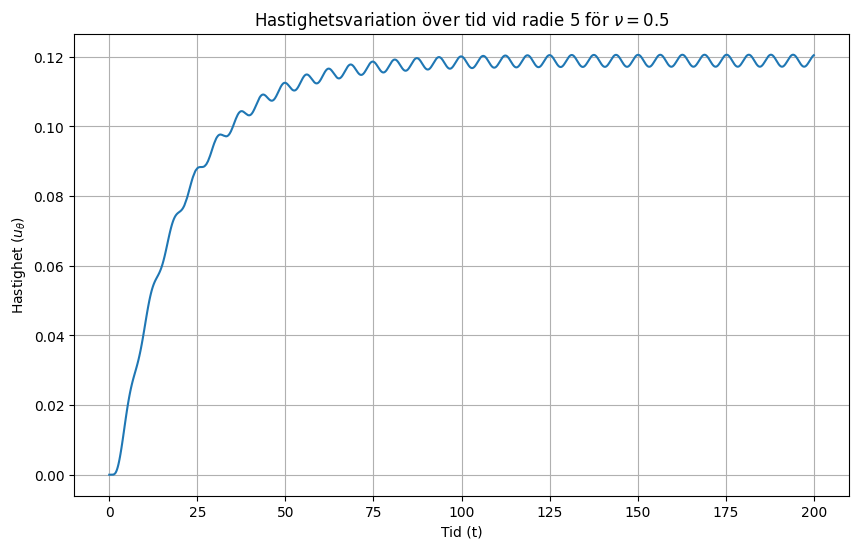

In [9]:
# Definierar den givna funktionen och plottar hastighetsvariationen för nu = 0.5 vid R = 1.5

def simulate(nu, omega,r_specific=5):
    # Rums- och tidsparametrar
    R = 1.0
    U = 1.0
    t_max = 200
    r_max = 10 * R
    dr = 0.1
    dt = 0.01
    r = np.arange(R, r_max, dr)
    time = np.arange(0, t_max, dt)

    # Initialisera lösningen u_theta
    u_theta = np.zeros((len(time), len(r)))

    # Tillämpa randvillkoret vid r = R
    u_theta[:, 0] = omega(time) * R

    # Hitta index för den specifika radien
    r_index = np.argmin(np.abs(r - r_specific))

    # Lösning med finita differensmetoden
    for n in range(0, len(time) - 1):
        for j in range(1, len(r) - 1):
            # Central differens i r
            dudr = (u_theta[n, j+1] - u_theta[n, j-1]) / (2 * dr)
            d2udr2 = (u_theta[n, j+1] - 2*u_theta[n, j] + u_theta[n, j-1]) / dr**2

            # Tidsderivatet av u_theta
            du_dt = (U * R / r[j]) * dudr + (U * R / r[j]**2) * u_theta[n, j] + nu * (d2udr2 + (1/r[j]) * dudr - u_theta[n, j] / r[j]**2)

            # Explicit Euler för att uppdatera u_theta
            u_theta[n + 1, j] = u_theta[n, j] + dt * du_dt

    # Plotta hastighetsvariation vid en specifik radie
    plt.figure(figsize=(10, 6))
    plt.plot(time, u_theta[:, r_index])
    plt.xlabel('Tid (t)')
    plt.ylabel('Hastighet ($u_\\theta$)')
    plt.title('Hastighetsvariation över tid vid radie {} för $\\nu = {}$'.format(r_specific, nu))
    plt.grid(True)
    plt.show()

# Kör funktionen med specifika parametrar
nu = 0.5
omega_sin = lambda t: 2 + 1 * np.sin(t)
simulate(nu, omega_sin)
